In [8]:
# Importando bibliotecas

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


1- Juntar todas as imagens em uma única

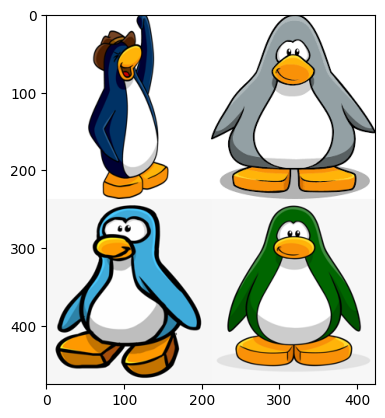

In [9]:

def convert_to_rgb(image):
    if image.mode != 'RGB':
        return image.convert('RGB')
    return image


img1 = Image.open('P1.png')
img2 = Image.open('P2.png')
img3 = Image.open('P3.jpg')
img4 = Image.open('P4.png')


img1 = convert_to_rgb(img1)
img2 = convert_to_rgb(img2)
img3 = convert_to_rgb(img3)
img4 = convert_to_rgb(img4)


img1_arr = np.array(img1)
img2_arr = np.array(img2)
img3_arr = np.array(img3)
img4_arr = np.array(img4)


new_size = (min(img1_arr.shape[1], img2_arr.shape[1], img3_arr.shape[1], img4_arr.shape[1]),
            min(img1_arr.shape[0], img2_arr.shape[0], img3_arr.shape[0], img4_arr.shape[0]))

img1_resized = np.array(img1.resize(new_size))
img2_resized = np.array(img2.resize(new_size))
img3_resized = np.array(img3.resize(new_size))
img4_resized = np.array(img4.resize(new_size))


top_row = np.hstack((img1_resized, img2_resized))  
bottom_row = np.hstack((img3_resized, img4_resized))  


combined_image = np.vstack((top_row, bottom_row))


final_image = Image.fromarray(combined_image)


plt.imshow(final_image)

final_image.save('PinguinsTodosJuntos.png')


2- Trocar as cores (mudar a cor dos pinguins para qualquer outra)

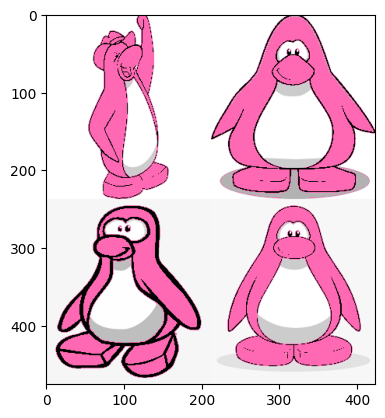

In [10]:

img = Image.open('PinguinsTodosJuntos.png')

image = np.array(img)[:, :, :3]

mask = np.all(image > [177, 177, 177], axis=-1)
black_mask = np.all(image < [30, 30, 30], axis=-1)


new_color = [255, 105, 180]  # Rosa
image_recolored = image.copy()
image_recolored[~mask & ~black_mask] = new_color


image_recolored = Image.fromarray(image_recolored)

plt.imshow(image_recolored)

image_recolored.save('Imagem_Colorida.png')

3- Aplicar o espelhamento

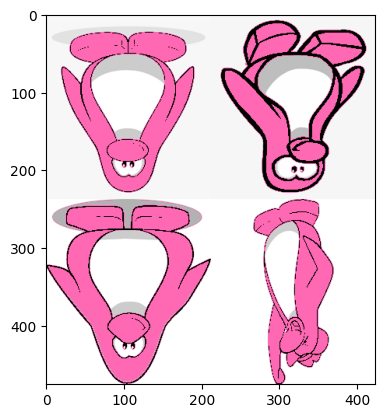

In [11]:

img = Image.open('Imagem_Colorida.png')


image = np.array(img)[:, :, :3]


img_refl = np.zeros(shape=image.shape, dtype=np.uint8)
img_refl[::-1, ::-1] = image


img_refl = Image.fromarray(img_refl)


plt.imshow(img_refl)

img_refl.save('imagem_Espelhada.png')

4- Recortar seu pinguim favorito (descarte os outros, deixando apenas um na imagem).

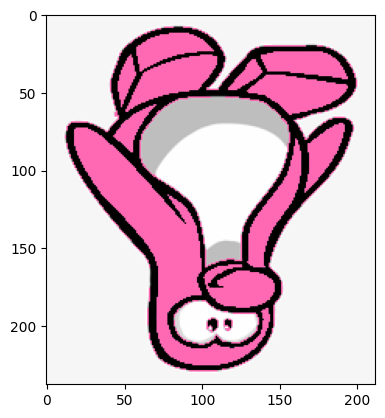

In [12]:

img = Image.open('imagem_Espelhada.png')


image = np.array(img)

height, width, _ = image.shape


half_height = height // 2
half_width = width // 2


first_quadrant = image[0:half_height, half_width:width]


first_quadrant_img = Image.fromarray(first_quadrant)


plt.imshow(first_quadrant_img)

first_quadrant_img.save('Pinguim_Favorito.png')

5- Faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold. (Justifique a escolha do threshold)

O valor do threshold escolhido foi de 128
Motivo: O valor 128, ponto médio da escala de cinza, ajuda a separar os pinguins do fundo, assumindo que são mais escuros. Pixels abaixo de 128 são classificados como pinguins, enquanto os acima são fundo


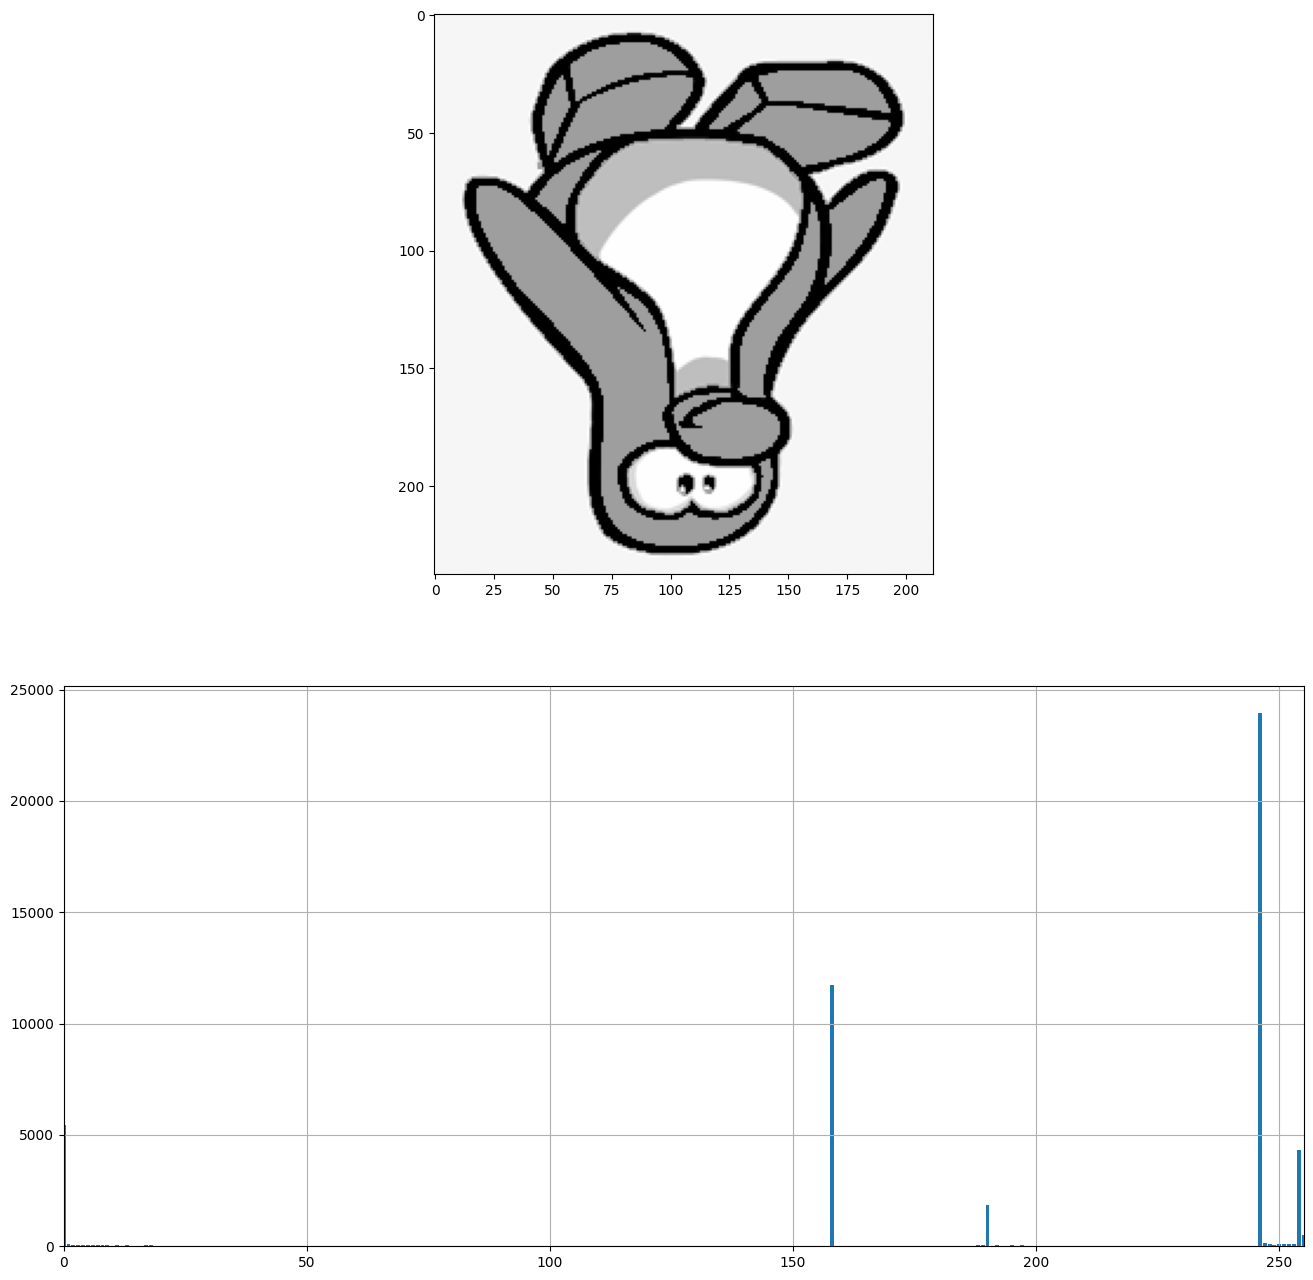

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def histogram_gray(img):
    (l, c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)
    plt.xlim(0, 255)
    plt.grid()


pin_image = Image.open('Pinguim_Favorito.png') 
img = np.array(pin_image.convert('L'))  # Converter para escala de cinza

show_histogram_gray(img)

threshold = 128 

print(f'O valor do threshold escolhido foi de {threshold}')

print("Motivo: O valor 128, ponto médio da escala de cinza, ajuda a separar os pinguins do fundo, assumindo que são mais escuros. Pixels abaixo de 128 são classificados como pinguins, enquanto os acima são fundo")





6- Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita (por exemplo: Azul)
O threshold escolhido foi 143, é o valor ideal que separa todas as cores do pinguim (rosa e as linhas pretas) do fundo branco

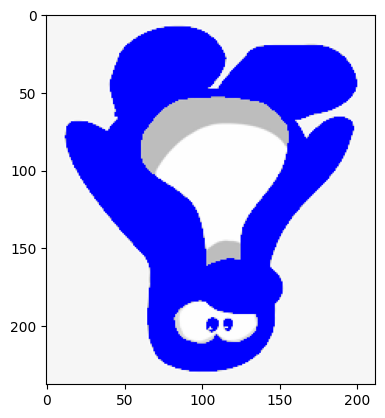

In [14]:

penguin = np.array(Image.open('Pinguim_Favorito.png'))
(l, c, p) = penguin.shape
penguin_gray = ((0.2126 * penguin[:, :, 0]) + (0.7152 * penguin[:, :, 1]) + (0.0722 * penguin[:, :, 2])).astype(np.uint8)

def apply_color_threshold(penguin_gray, threshold, color=(0, 0, 255)):
 
    result_img = np.stack([penguin_gray]*3, axis=-1)
    
  
    below_threshold = penguin_gray < threshold
    
    result_img[below_threshold] = color
    
    return result_img


threshold_value = 143


penguin_colored = apply_color_threshold(penguin_gray, threshold_value)


penguin_colored = Image.fromarray(penguin_colored)


plt.imshow(penguin_colored)

penguin_colored.save('Pinguim_Colorido_Threshold.png')